In [2]:
import cv2
import numpy as np
# import sys
# import time
# import imutils
import matplotlib.pyplot as plt

In [126]:
inputImage = cv2.imread("4qrcodes.png")


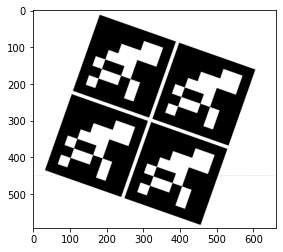

In [127]:
plt.imshow(inputImage)

In [82]:
class QRMultidecoder():
    def __init__(self):
        self.qrDecoder = cv2.QRCodeDetector()
        
    def centroidnp(arr):
            length = arr.shape[0]
            sum_x = sum(arr[:, 0])
            sum_y = sum(arr[:, 1])
            return int(sum_x/length), int(sum_y/length)
        
    def detect(self,img):
        # Detect and decode the qrcode
        _,data,bbox_list,_ = self.qrDecoder.detectAndDecodeMulti(img)

        if len(bbox_list) == 4 and data==['Diabetes']*4:
            bbox_list = bbox_list.astype(np.int)
            bbox_list = bbox_list.reshape(-1,2)
            xs = bbox_list[:,0]
            ys = bbox_list[:,1]
            leftx = min(xs)
            left = bbox_list[xs == leftx]
            rightx = max(xs)
            right = bbox_list[xs == rightx]
            topy = max(ys)
            top = bbox_list[ys == topy]
            bottomy = min(bbox_list[:,1])
            bottom = bbox_list[ys == bottomy]
            rectangle = np.array([right,top,left,bottom])
            rectangle = rectangle.reshape(-1,2)

            return rectangle
        else:
            return None

In [83]:
qrdecoder = QRMultidecoder()
bboxes = qrdecoder.detect(inputImage)

In [84]:
bboxes.shape

(4, 2)

In [85]:
bboxes

array([[607, 224],
       [400, 599],
       [ 17, 387],
       [219,   9]])

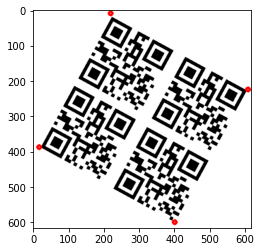

In [88]:
img = cv2.imread("4qrcodes.png")
for r in bboxes:
    img = cv2.circle(img,(r[0],r[1]),5,(255,0,0),5)
plt.imshow(img)

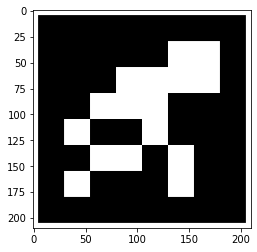

In [121]:
import cv2
import numpy as np
# markerImage = cv2.imread("4qrcodes.png")

# Load the predefined dictionary
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Generate the marker
markerImage = np.zeros((200, 200), dtype=np.uint8)
markerImage = cv2.aruco.drawMarker(dictionary, 33, 200, markerImage, 1);

frame = markerImage
dst = cv2.copyMakeBorder(frame,5,5,5,5,borderType=cv2.BORDER_CONSTANT,value=(255,255,255))

In [124]:
#Load the dictionary that was used to generate the markers.
dictionary = cv2.aruco.Dictionary_get(cv2.aruco.DICT_6X6_250)

# Initialize the detector parameters using default values
parameters =  cv2.aruco.DetectorParameters_create()

# Detect the markers in the image
markerCorners, markerIds, rejectedCandidates = cv2.aruco.detectMarkers(dst, dictionary, parameters=parameters)


In [125]:
markerCorners

[array([[[  5.,   5.],
         [204.,   5.],
         [204., 204.],
         [  5., 204.]]], dtype=float32)]